In [139]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [140]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

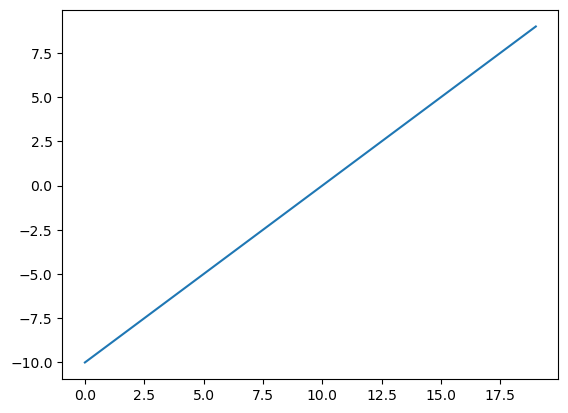

In [141]:
# Visualize our toy tensor
plt.plot(A);

In [142]:
# Sigmoid 
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

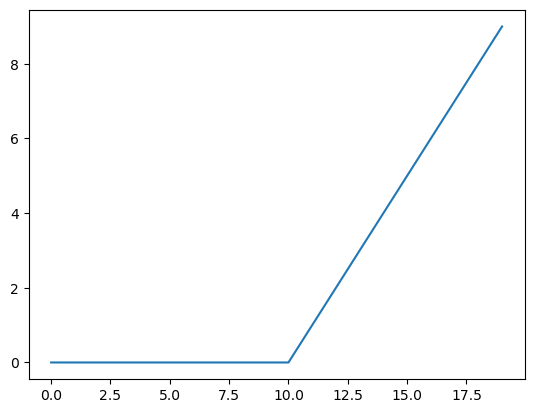

In [143]:
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(A))

In [144]:
# linear
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [145]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

so here we can see that when we add linear activation function our model is not learn anaythin that's why we are getting the same result

## Evaluating and improving our classification model

In [146]:
# same data set in the neural_network_classification_with_tensorflow.ipynb
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [147]:
len(X)

1000

In [148]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [149]:
# Set random seed
tf.random.set_seed = 42

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25, verbose=0)

In [150]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9950
Model loss on the test set: 0.043569885194301605
Model accuracy on the test set: 99.50%


# Visualize the data

In [151]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...
doing binary classifcation...


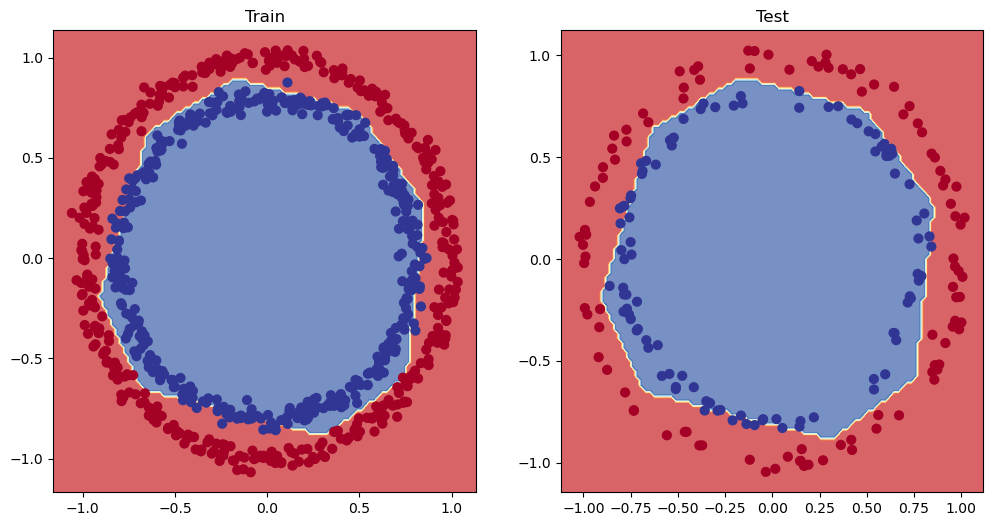

In [152]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).
You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [153]:
# You can access the information in the history variable using the .history attribute
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.699127,0.45500
1,0.693496,0.47250
2,0.689968,0.50500
3,0.687389,0.53625
4,0.684980,0.54875
5,0.682380,0.55000
6,0.678412,0.58125
7,0.673961,0.61500
8,0.667579,0.62625
9,0.660056,0.64375


Text(0.5, 1.0, 'Model training curves')

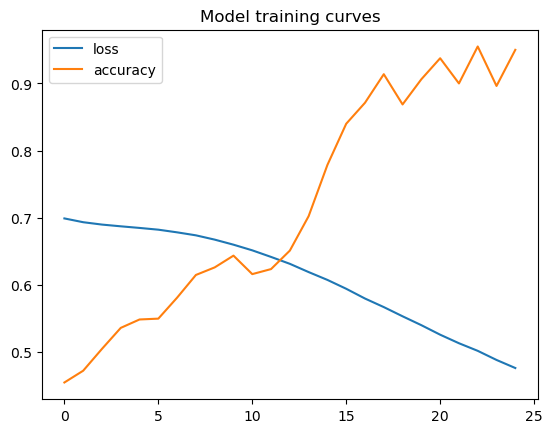

In [154]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model training curves")

# Finding the best learning rate

In [155]:
# Set random seed
tf.random.set_seed=42

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler], verbose=0)

In [161]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.9654 - accuracy: 0.4950
Model loss on the test set: 0.9653881788253784
Model accuracy on the test set: 49.50%


<AxesSubplot:xlabel='epochs'>

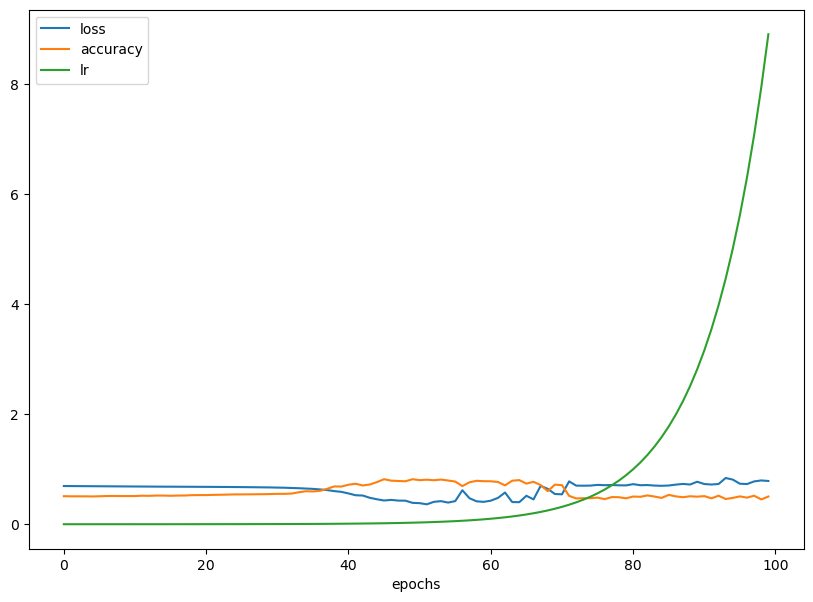

In [162]:
# check out the history
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs")

By looking this graph we can say that our model lose decreasing between 40-45 epochs so we can take a value between this

Text(0.5, 1.0, 'Learning rate vs. loss')

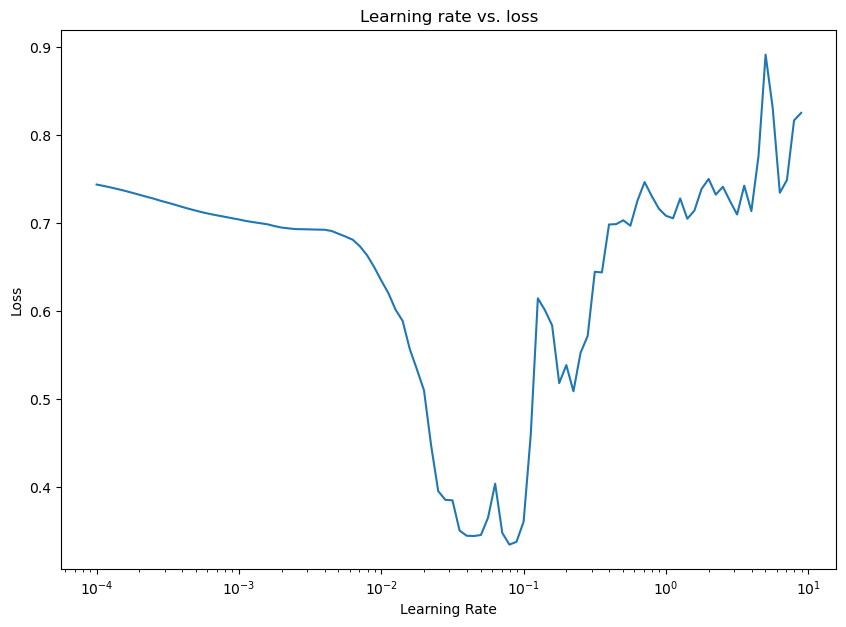

In [163]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [164]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

 from this plot we can see that loss is decreasing when the learning rate is 0.02 

In [165]:
# Lets create a model with this learning reate
# Set random seed
tf.random.set_seed=42

# Create a model (same as model_8)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"]) 

# Fit the model (passing the lr_scheduler callback)
history = model_10.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler], verbose=0)

In [166]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"The loss is:{loss}")
print(f"The accuracy is:{accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4950
The loss is:0.6941669583320618
The accuracy is:0.4950000047683716
